# NLP 2025
# Lab 1: Tokenization

Tokenization is a fundamental step in **Natural Language Processing (NLP)** 🧠💬 that transforms raw text into structured data for computational models. In this lab, you will explore different **tokenization techniques** 📝, preprocess text data 🔍, and implement **tokenization pipelines** using popular NLP libraries 🏗️.  

You will also gain **hands-on experience** with **Hugging Face Datasets 🤗📚**, while assessing the impact of tokenization choices on downstream NLP tasks. 

By the end of this lab, you will have a **strong foundation** in tokenization techniques and be able to apply them effectively in **real-world NLP applications** 🌍.  

---

### 🎯 **Learning Goals**  

By the end of this lab, you should be able to:  

✅ **Understand the role of tokenization in NLP** 🧠💡  
✅ **Explain why tokenization is important** and how it affects text processing 📖🔍  
✅ **Implement different tokenization techniques** – Apply **word** 📝, **subword** 🔢, and **character-level** 🔠 tokenization using built-in libraries.  
✅ **Use Hugging Face Datasets** 🤗📊 – Load and preprocess text datasets efficiently.  
✅ **Evaluate tokenization impact** 📉🔎 – Analyze how different tokenization methods influence model performance.  
✅ **Identify challenges in tokenization** ❗🔍 – Recognize issues like **out-of-vocabulary (OOV) words**, **ambiguity**, and **multilingual tokenization** 🌍.  

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 5      |
| [Exercise 2](#e2)   | 6      |
| [Exercise 3](#e3)   | 5      |
| [Exercise 4](#e4)   | 12     |
| [Exercise 5](#e5)   | 5      |
| [Exercise 6](#e6)   | 22     |
| [Exercise 7](#e7)   | 5      |
| [Exercise 8](#e8)   | 5      |
| [Exercise 9](#e9)   | 10     |
| [Exercise 10](#e10) | 25     |
| Total               | 100    |

This score will be scaled down to 0.5 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 11/Apr 18:00**, 🎭 *wildcards possible*)  

✅ **Submission Requirements**  
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.  
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.  

✅ **Collaboration & Integrity**  
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.  
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.  
+ 📢 **Mandatory Disclosure**:  
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.  
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.  
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.   

## Preparation

In [1]:
# ! pip install -U datasets~=3.2.0
# ! python3 -m pip install -U matplotlib

In [1]:
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import datasets
import pandas as pd
import tqdm

## 0. Intro to regular expressions

In this introduction section, you can practice the use of regular expressions in python. You can find the documentation here: [https://docs.python.org/3/library/re.html](https://docs.python.org/3/library/re.html). The main functions of the re module are:
- `re.search()` - searches for a pattern in a string, returns the first match,
- `re.findall()` - similar to `search()`, but returns a list of all matches,
- `re.sub()` - replaces the matches with a string.

All above functions accept the regular expression pattern as their argument. The patterns are strings that represent the rules for matching the text. In python they start with `r` character, e.g. `r'\d'` is a pattern that matches a digit.

Let us start with a simple example. We will search for the word "world" in the string "Hello, world!".

In [2]:
text = "Hello, world!"
pattern = r'world'
match = re.search(pattern, text)
print(match)

<re.Match object; span=(7, 12), match='world'>


The `search()` function returns a match object that tells us where the match was found (`span` argument) and the exact part of the string that matched the pattern (`group` argument).

Below you can find the examples from the lecture.

In [3]:
# Disjunctions
pattern = r'[wW]oodchuck' # matches both "woodchuck" and "Woodchuck"
pattern = r'[1234567890]' # matches any digit
pattern = r'[0-9]' # matches any digit
pattern = r'[A-Z]' # matches any uppercase letter
pattern = r'[a-z]' # matches any lowercase letter
pattern = r'[A-Za-z]' # matches any letter

# Disjunctions with pipe |
pattern = r'groundhog|Woodchuck' # matches both "woodchuck" and "Woodchuck"

# Negation (only when in [])
pattern = r'[^0-9]' # matches any character that is not a digit
pattern = r'[^Ss]' # matches any character that is not 'S' or 's'
pattern = r'a^b' # matches the string "a^b"

# Quantifiers (+, *, ?, .)
pattern = r'baa+' # matches "ba" followed by one or more "a" (e.g. "baa", "baaa", "baaaa", ...)
pattern = r'oo*h' # matches "o" followed by zero or more "o" and then "h" (e.g. "oh", "ooh", "oooh", ...)
pattern = r'colou?r' # matches "color" and "colour"
pattern = r'beg.n' # matches "begun", "begin", "begnn", ...

# Anchors (^, $)
pattern = r'^Hello' # matches "Hello" at the beginning of the string
pattern = r'world!$' # matches "world!" at the end of the string

## 1. Huggingface datasets

For this lab, we will use the **Hugging Face Datasets** library ([Hugging Face Datasets](https://huggingface.co/datasets)), which provides an extensive collection of ready-to-use NLP datasets. The library is designed to be lightweight, efficient, and compatible with popular deep learning frameworks such as PyTorch and TensorFlow.  

You can find the full documentation and tutorials here:  
📌 [Hugging Face Datasets Documentation](https://huggingface.co/docs/datasets/en/index)  

### **Why use Hugging Face Datasets?**  
- **Easy Access:** Load datasets with a single command without manual downloads.  
- **Standardized Format:** Datasets come in a unified structure, making them easy to preprocess and integrate into ML pipelines.  
- **Large Collection:** Provides datasets for a wide range of NLP tasks, including classification, translation, summarization, and more.  
- **Seamless Integration:** Works with `transformers` and `sklearn` for preprocessing and model training.  

### **Dataset for this lab: TweetEval - Emoji Subset**  

In this lab, we will work with the **TweetEval** dataset, specifically the **emoji** subset. The TweetEval dataset is a benchmark for evaluating NLP models on Twitter-related tasks, covering tasks such as sentiment analysis, hate speech detection, and irony detection.  

For tokenization, we will focus only on the **text** (the content of the tweets), but we will also examine the **labels** to understand the dataset structure.  

🔗 The dataset description and details are available in its dataset card: [**TweetEval Dataset**](https://huggingface.co/datasets/cardiffnlp/tweet_eval) 

💡 Exploring More Datasets
Hugging Face provides a vast selection of datasets across different NLP tasks. You can browse and explore more at:
🔗 [Hugging Face Datasets Collection](https://huggingface.co/datasets)

In [4]:
tweet_ds = datasets.load_dataset('tweet_eval', 'emoji')
print(tweet_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 5000
    })
})


The loaded dataset contains three subsets (“train”, “validation”, and “test”). Each consists of two columns: “text” and “label”. Label is an integer from 0 to 19 representing an emoji. See the dataset's card for more information. We can access the elements of the dataset like so:

In [5]:
for i in range(10):
    print(tweet_ds['train'][i])

{'text': 'Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice', 'label': 12}
{'text': "Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que)", 'label': 19}
{'text': 'Love love love all these people ️ ️ ️ #friends #bff #celebrate #blessed #sundayfunday @ San…', 'label': 0}
{'text': '️ ️ ️ ️ @ Toys"R"Us', 'label': 0}
{'text': 'Man these are the funniest kids ever!! That face! #HappyBirthdayBubb @ FLIPnOUT Xtreme', 'label': 2}
{'text': '#sandiego @ San Diego, California', 'label': 11}
{'text': 'My little ️ ️ ️ ️ ️ #ObsessedWithMyDog @ Cafe Solstice Capitol Hill', 'label': 0}
{'text': 'More #tinyepic things #tinyepicwestern, this one is crazy @user I may be one of your…', 'label': 19}
{'text': 'Last night ️ @ Omnia Night Club At Caesars Palace', 'label': 0}
{'text': 'friendship at its finest. ....#pixar #toystory #buzz #woody #friends #friendship #bff…', 'label': 7}


You can easily cast the dataset to the pandas DataFrame.

In [6]:
tweet_train_df = pd.DataFrame(tweet_ds['train'])
print(tweet_train_df)

                                                    text  label
0      Sunday afternoon walking through Venice in the...     12
1      Time for some BBQ and whiskey libations. Chomp...     19
2      Love love love all these people ️ ️ ️ #friends...      0
3                                    ️ ️ ️ ️ @ Toys"R"Us      0
4      Man these are the funniest kids ever!! That fa...      2
...                                                  ...    ...
44995  Here to celebrate the Nunez wedding! Love my b...      0
44996  1 night in Paris.... Wait... @ Paris Las Vegas...      1
44997  Be safe this weekend everyone. #happylaborday ...     11
44998          Pizza (@ Five50 - @user in Las Vegas, NV)      1
44999  my mini is perfect, no one deserves her @ Las ...     13

[45000 rows x 2 columns]


We can plot the distribution of the labels in the training subset.

<Axes: xlabel='label'>

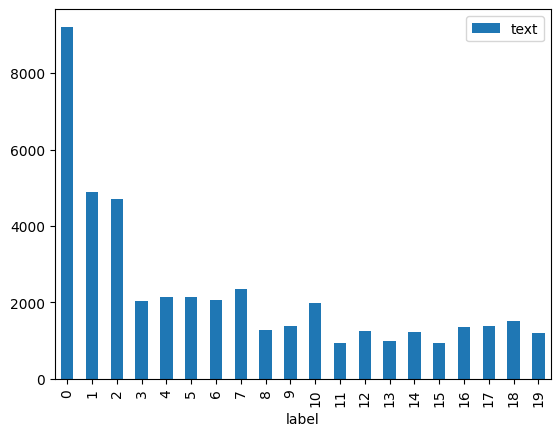

In [7]:
tweet_train_df.groupby('label').count().plot.bar()

### Dataset's filter function
We can filter the examples using ```filter()``` method. See this link for more details https://huggingface.co/docs/datasets/en/use_dataset. Here is an example of filtering the short tweets (less than 20 characters) from the ```train``` subset.

In [8]:
short_tweets = tweet_ds['train'].filter(lambda example: len(example['text']) < 20)
print(short_tweets)

Dataset({
    features: ['text', 'label'],
    num_rows: 506
})


In [9]:
for i in range(10):
    print(short_tweets[i])

{'text': '️ ️ ️ ️ @ Toys"R"Us', 'label': 0}
{'text': '️ @ Columbia River', 'label': 12}
{'text': 'My weekend: @user 3', 'label': 6}
{'text': 'good day today', 'label': 3}
{'text': 'My last RT...', 'label': 2}
{'text': '@ On Lake Cowichan', 'label': 13}
{'text': '@ Macroplaza', 'label': 4}
{'text': '@ BART Train', 'label': 6}
{'text': '️ 4 a tbh&amp; rate', 'label': 0}
{'text': '@user Oh nice!!', 'label': 14}


### Dataset's map function
Datasets library contains a very useful method map. It expects a function that will receive an example from the dataset. This function will be applied to all entries. We will calculate the length of the text (in characters) in each example.

In [10]:
def calculate_text_length(example):
    example['text_length'] = len(example['text'])
    return example

In [11]:
tweet_ds = tweet_ds.map(calculate_text_length)
print(tweet_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'text_length'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'text_length'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'text_length'],
        num_rows: 5000
    })
})


We can plot the histogram of the text lengths.

<Axes: ylabel='Frequency'>

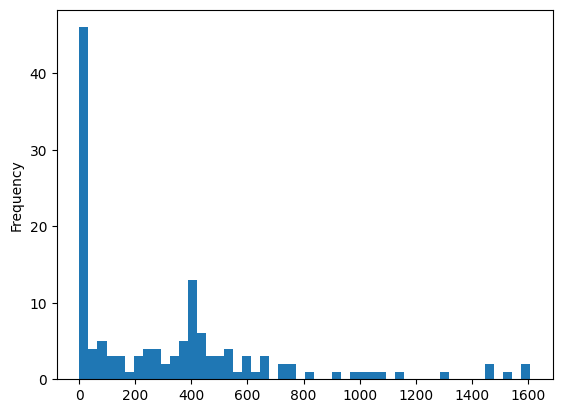

In [12]:
pd.DataFrame(tweet_ds['train']).groupby('text_length')['text_length'].count().plot.hist(bins=50)

<a name="e1"></a>

### Exercise 1: Questions about the datasets
1. (1p) What is the size of the training, test and validation datasets?
2. (1p) What are the top 5 most frequent emojis in the validation dataset?
3. (1p) Compare the distributions of labels (emojis) between training and validation datasets.
4. (1p) How many examples with the "fire" emoji are in the training dataset?
5. (1p) What is the average length (in characters) of the tweets in the training dataset?

You can add cells here to answer the questions

train set ->  (45000, 3)
test set ->  (50000, 3)
validation set ->  (5000, 3)
label
0    1056
1     521
2     504
3     308
4     243
Name: count, dtype: int64


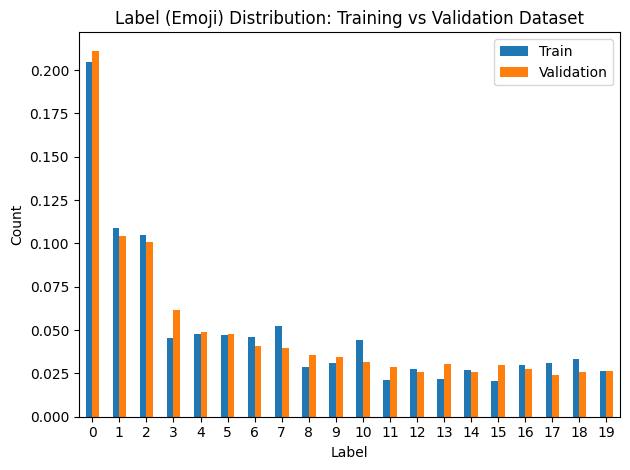

Number of tweets with label 4: 2146
Average tweet length (training set): 71.02 characters


In [14]:

#1
# print size of training, test and validation datasets
print("train set -> ", tweet_ds['train'].shape)
print("test set -> ", tweet_ds['test'].shape)
print("validation set -> ", tweet_ds['validation'].shape)

#2
tweet_validation_df = pd.DataFrame(tweet_ds['validation']) # create a validation data frame
top_5_labels = tweet_validation_df['label'].value_counts().head(5) # get top 5 most frequent emojis
print(top_5_labels) # print the result

#3
train_counts = tweet_train_df['label'].value_counts(normalize=True).sort_index() # count and normalize tweets in training data set for each emoji
val_counts = tweet_validation_df['label'].value_counts(normalize=True).sort_index() # count and normalize tweets in validation data set for each emoji

# create a separate data frame with both counts
comparison_df = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts
}).fillna(0)

# plot the results as a box plot
comparison_df.plot(kind='bar', title='Label (Emoji) Distribution: Training vs Validation Dataset', rot=0)
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

#4
train_ds_mapped = tweet_ds["train"].map(calculate_text_length)
train_df = pd.DataFrame(train_ds_mapped)
count_label_4 = (train_df['label'] == 4).sum() #count the number of occurances of label 4 in the training set

print(f"Number of tweets with label 4: {count_label_4}")

#5
average_len = sum(train_df["text_length"]) / len(train_df) #compute the average lenghth of tweets in the training set
print(f"Average tweet length (training set): {average_len:.2f} characters")

## 2. Tokenization

In this section we will preprocess the dataset by cleaning and tokenizing the entries.
Datasets library contains a very useful method map. It expects a function that will receive an example from the dataset. This function will be applied to all entries.

### 2.1 Cleaning the text

<a name="e2"></a>
### Exercise 2: Write the text cleaning function

Include at least the following steps:
- (1p) remove comma between numbers, i.e. 15,000 -> 15000
- (1p) remove multiple spaces
- (1p) space out the punctuation (i.e. "hello, world." -> "hello , world .")
- (3x1p) three more cleaning steps of your choice

In [14]:
def clean(example):
    """
    Cleans the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: update example containing 'clean' column

    """
    text = example['text']

    # Empty text
    if text == '':
        example['clean'] = ''
        return example

    # 'text' from the example can be of type numpy.str_, let's convert it to a python str
    text = str(text)

    ### YOUR CODE HERE


    # remove comma between numbers

    text = re.sub(r"(?<=\d),(?=\d)", "", text)

    # remove multiple fullstops

    text = re.sub(r'\.+', r'.', text) # seemed more logical to put it before spacing out the punctuation

    
    # space out the punctuation

    text = re.sub(r'([….,!?;:(){}[\]<>])', r' \1 ', text)

    # remove multiple spaces
    
    text = re.sub(' +', ' ', text)


    # three more cleaning steps of your choice


    # remove non-standart characters as "#" and "@"

    # text = re.sub(r'([@#])(?=\d)', r'\1 ', text)
    text = re.sub(r'([@|#])', ' ', text)

    # remove 'a' 'an' 'the articles

    text = re.sub(r'\b[Aa]\b|\b[Aa]n\b', ' ', text)
    text = re.sub(r'\b[Tt]he\b', ' ', text)


    # replace "&" with "and"

    text = re.sub(r'\b&\b', 'and', text)

    # remove \n and \t

    text = re.sub(r'[\n\t]', '', text)

    # remove multiple spaces

    text = re.sub(r'[\u200B-\u200D\uFE0F\u200E\u200F]', '', text)  # Removing variation selectors and zero-width characters By ChatGPT
    
    text = re.sub(r'\s+', ' ', text)  # repeat space cleaning just in case


    ### YOUR CODE ENDS HERE

    # Update the example with the cleaned text
    example['clean'] = text.strip()
    return example

This is an example of applying the ```clean()``` function you just wrote to a single entry of the dataset. The function added a 'clean' field to the example.

In [15]:
for i in range(500,510):
    print('Original tweet item:')
    print(tweet_ds['train'][i]['text'])
    print('Cleaned tweet item:')
    print(clean(tweet_ds['train'][i])['clean'])

Original tweet item:
Yo I used to be so excited to see Keni's 11:11 tweets
Cleaned tweet item:
Yo I used to be so excited to see Keni's 11 : 11 tweets
Original tweet item:
Phase 2 of the #redkenhaircolorauthority in Pleasanton!! ️ Official graduation tomorrow for…
Cleaned tweet item:
Phase 2 of redkenhaircolorauthority in Pleasanton ! ! Official graduation tomorrow for …
Original tweet item:
Can't forget my @user "Chonchaaaaaaa" so great meeting you, you had me cracking up. Ummm can…
Cleaned tweet item:
Can't forget my user "Chonchaaaaaaa" so great meeting you , you had me cracking up . Ummm can …
Original tweet item:
️ (@ Venice Beach in Venice, CA)
Cleaned tweet item:
( Venice Beach in Venice , CA )
Original tweet item:
Good friends and good times at @user #twangsunday ️ ️ #musicianslife #tourkickoff @user
Cleaned tweet item:
Good friends and good times at user twangsunday musicianslife tourkickoff user
Original tweet item:
Last night at the @user party with @user &amp; @user ️ love 

Let's finally use the ```map()``` method and apply your `clean()` function to all entries of the dataset. You can see that the ```clean``` column has been added to each split.

Below, we will apply your function to all entries in the dataset.

In [16]:
tweet_ds = tweet_ds.map(clean)
print((tweet_ds['train'][500])['clean'])
print(tweet_ds)

Yo I used to be so excited to see Keni's 11 : 11 tweets
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'text_length', 'clean'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'text_length', 'clean'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'text_length', 'clean'],
        num_rows: 5000
    })
})


### 2.2 Build vocabulary

In the previous section, we implemented the cleaning of the dataset. Now, we will tokenize the text splitting it by spaces. We will build a vocabulary based on the cleaned text of the `train` split. We will investigate some properties of corpora (e.g. Zipf's law).

The function below builds a vocabulary from the dataset. It counts the occurrences of the words in the dataset using the Counter class. Check the documentation here [collections.Counter](https://docs.python.org/3/library/collections.html#collections.Counter).

### Exercise 3: Build the vocabulary
(5p) Fill in the function below to build the vocabulary from the dataset. The function should return a `Counter` object with the words and their frequencies. The variable named `vocab` is already initialized as an empty `Counter` object.

In [17]:
def build_vocab_counter(dataset):
    """
    Builds a vocabulary from the dataset
    Args:
        dataset: a dataset

    Returns: a vocabulary

    """
    vocab = Counter()

    ### YOUR CODE HERE

    for tweet in dataset: # iterate over each tweet
        words = tweet["clean"].split() # split the cleaned text into individual words
        vocab.update(words) # update the vocabulary with the words from this tweet



    ### YOUR CODE ENDS HERE
    return vocab

In [18]:
vocab_counter = build_vocab_counter(tweet_ds['train'])
print('Size of the vocabulary:', len(vocab_counter))

Size of the vocabulary: 69388


Because we created a counter, we can easily check the most and least common words in the vocabulary. Do the most common words make sense? How about the least common ones?

In [19]:
print('Most common:')
print(vocab_counter.most_common(10))
print('Least common:')
print(vocab_counter.most_common()[-10:])

Most common:
[('…', 19238), ('!', 16957), ('.', 16089), (',', 12383), ('user', 12236), ('to', 7630), ('I', 6457), ('my', 5971), ('in', 5664), ('and', 5387)]
Least common:
[('southbayla', 1), ('thedabberchick', 1), ('nector', 1), ('chefking1921express', 1), ('rolltide', 1), ('Players', 1), ('bffweekend', 1), ('Nunez', 1), ('happylaborday', 1), ('Five50', 1)]


We can also plot the counts of the words. You can check the [Power law](https://en.wikipedia.org/wiki/Power_law) if you are more interested.

Text(0, 0.5, 'count')

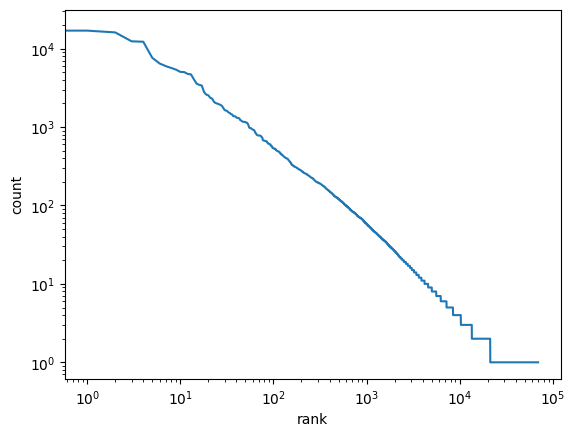

In [20]:
plt.loglog([val for word, val in vocab_counter.most_common()])
plt.xlabel('rank')
plt.ylabel('count')

The plot shows that the distribution of the words in the vocabulary follows the Zipf's law. The most frequent word occurs approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

We can also filter the vocabulary by the frequency of the words. We will only consider the most frequent words and mark the rest as the `<unk>` token. Here we set the maximum vocabulary size to 10,000. But in the later steps, you will experiment with different sizes.

In [21]:
max_vocab_size = 10000
vocab = vocab_counter.most_common(max_vocab_size)
# cast to list of words
vocab = [word for word, _ in vocab]
print(len(vocab))

10000


### Exercise 4: Frequency of pairs of words (bigrams)
Calculate the frequency of (neighbouring) pairs of words in the training dataset.
- (5p) List the most and least common pairs. Do the most common pairs make sense?
- (2p) How many pairs occur only once in the dataset?
- (5p) Plot the distribution of the pair frequencies.

Most common bigrams:
[(('!', '!'), 4947), ((',', 'California'), 3343), (('&amp', ';'), 2020), (('Los', 'Angeles'), 1738), (('with', 'my'), 1015), (('Angeles', ','), 998), (('user', 'user'), 984), (('Las', 'Vegas'), 982), ((',', 'CA'), 867), ((':', 'user'), 816)]

 Least common bigrams:
[(('.', 'happylaborday'), 1), (('happylaborday', 'Beer'), 1), (('Beer', 'NV'), 1), (('Pizza', '('), 1), (('(', 'Five50'), 1), (('Five50', '-'), 1), (('mini', 'is'), 1), (('one', 'deserves'), 1), (('deserves', 'her'), 1), (('her', 'Las'), 1)]

 Number of bigrams that occurred only once: 226946


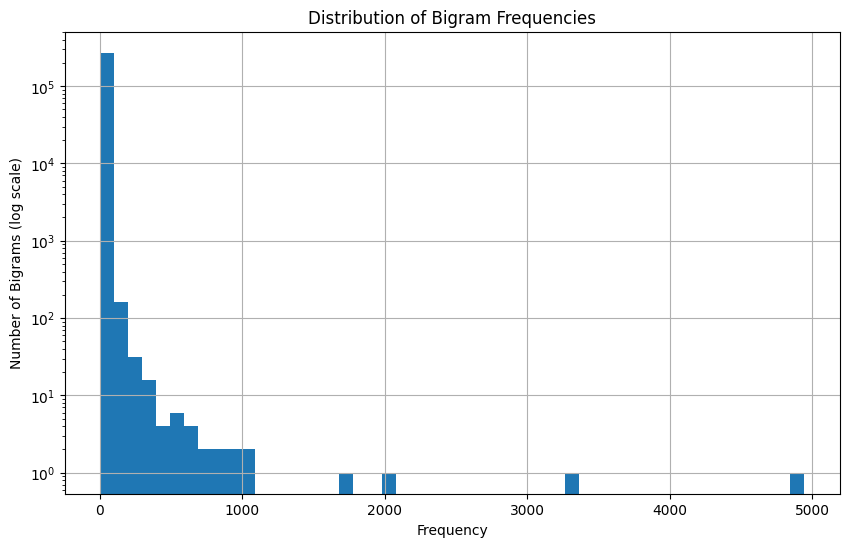

In [22]:
def get_bigram_frequencies(dataset):
    bigram_counter = Counter()

    for example in dataset: #iterate over each tweet
        words = example['clean'].split() # split the cleaned text into words
        bigrams = zip(words, words[1:])  # create bigrams by zipping adjacent words 
        bigram_counter.update(bigrams) # update the bigram counter with new bigrams

    return bigram_counter

bigram_freqs = get_bigram_frequencies(tweet_ds["train"])

# Most common
print("Most common bigrams:")
print(bigram_freqs.most_common(10))

# Least common
least_common = [bigram for bigram, count in bigram_freqs.items() if count == 1] # Bigrams with frequency 1
print("\n Least common bigrams:")
print(bigram_freqs.most_common()[-10:])

# Total count
print(f"\n Number of bigrams that occurred only once: {len(least_common)}")

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(bigram_freqs.values(), bins=50, log=True)
plt.title("Distribution of Bigram Frequencies")
plt.xlabel("Frequency")
plt.ylabel("Number of Bigrams (log scale)")
plt.grid(True)
plt.show()

### 2.3 Tokenize the dataset
The function below tokenizes the cleaned text (```example['clean']```) by splitting it on spaces. It replaces the words that are not in the vocabulary with the `<unk>` token.

### Exercise 5: Tokenize the dataset

(5p) Fill in the function below to tokenize the dataset. The function will be applied to the dataset through the `map()` method, so it returns the updated example. Your task is to split the text by spaces and replace the words that are not in the vocabulary with the `<unk>` token.

In [24]:
def tokenize(example, vocab, unknown_token='<unk>'):
    """
    Tokenizes the example from the Dataset
    Args:
        example: an example from the Dataset
        vocab: a vocabulary as a list of words
        unknown_token: a token to replace the words that are not in the vocabulary
    Returns: update example containing 'tokens' column

    """
    text = example['clean']
    tokens = None # list of tokens, your code should fill this variable

    ### YOUR CODE HERE
    tokens = text.split() # split text by white spaces
    for i in range(len(tokens)): # itherate through tokens
        if tokens[i] not in vocab: # if token is not in vocabulary 
            tokens[i] = unknown_token # replace tokem with unknown token
    ### YOUR CODE ENDS HERE

    example['tokens'] = tokens
    return example

In [24]:
tweet_ds = tweet_ds.map(tokenize, fn_kwargs={'vocab': vocab})
print(tweet_ds)

Map:   0%|          | 0/45000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens'],
        num_rows: 5000
    })
})


Let us examine several entries from the dataset. We can see that the `tokens` column has been added to each example.

In [25]:
for i in range(10):
    print('Original tweet:')
    print(tweet_ds['train'][i]['text'])
    print('Tokenized tweet:')
    print(tweet_ds['train'][i]['tokens'])

Original tweet:
Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice
Tokenized tweet:
['Sunday', 'afternoon', 'walking', 'through', 'Venice', 'in', 'sun', 'with', 'user', 'Abbot', 'Kinney', ',', 'Venice']
Original tweet:
Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que)
Tokenized tweet:
['Time', 'for', 'some', 'BBQ', 'and', 'whiskey', '<unk>', '.', '<unk>', ',', '<unk>', ',', '<unk>', '!', '(', "Lucille's", 'Smokehouse', 'Bar-B-Que', ')']
Original tweet:
Love love love all these people ️ ️ ️ #friends #bff #celebrate #blessed #sundayfunday @ San…
Tokenized tweet:
['Love', 'love', 'love', 'all', 'these', 'people', 'friends', 'bff', 'celebrate', 'blessed', 'sundayfunday', 'San', '…']
Original tweet:
️ ️ ️ ️ @ Toys"R"Us
Tokenized tweet:
['<unk>']
Original tweet:
Man these are the funniest kids ever!! That face! #HappyBirthdayBubb @ FLIPnOUT Xtreme
Tokenized tweet:
['Man', 'these', 'are', 'funniest', 'kids'

Make sure that the tokenization works as you intended. If not, revisit the cleaning and tokenization functions.

### Exercise 6: Questions about the tokenization
1. (3p) How many unknown tokens are in the validation dataset after tokenization?
2. (3p) What is the distribution of the number of tokens in the training dataset?
3. (4p) How the number of tokens corresponds to the number of characters in our dataset?
4. (4p) How the size of the vocabulary (```max_vocab_size```) affects the number of unknown tokens?
5. (4p) How does the size of the vocabulary affect the number of tokens in the dataset?
6. (4p) Think about the advantages and disadvantages of the tokenization method we used. What are the cases when it will not work well?

For answering these questions make sure to include a proper mix of numbers/plots/tables etc. and comments.

number of unknown tokens are in the validation dataset =  10106
number of tokens are in the validation dataset =  58280
percernage of unknown tokens in the validation dataset =  17.340425531914892 %


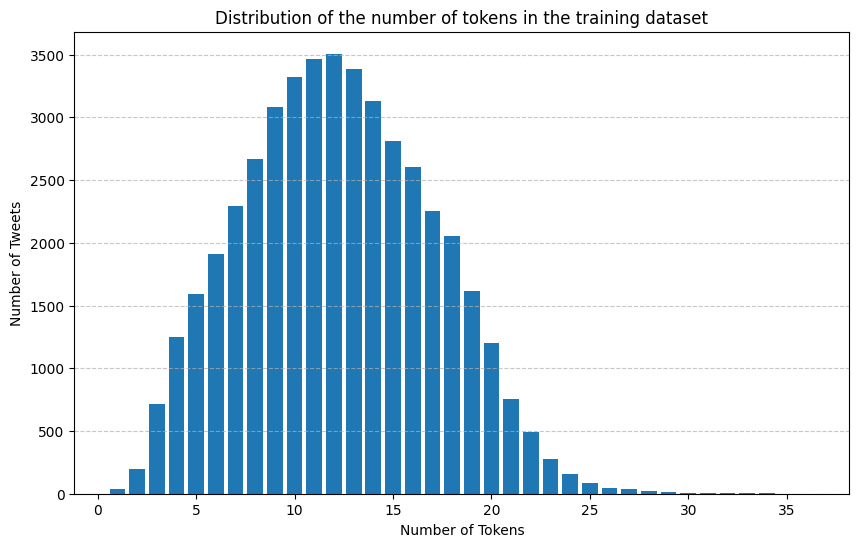

mean = 12.224444444444444


Map:   0%|          | 0/45000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

the number of characters 7092437
the number of tokens     1232674
average token lenght =  5.7537004917764145


In [27]:
# 1
sum_unk_val = 0 # summ of all tokens in a validation dataset
sum_all = 0 # sum of unknown tokens in validation datset
for tweet in tweet_ds['validation'][:]['tokens']: # iterate through tweets in validation dataset
    for token in tweet: # iterate through tokens in a tweet
        sum_all += 1 # add one to summ of all tokens
        if(token == "<unk>"): # if token is an unknown token
            sum_unk_val += 1 # add one to sum of unknown tokens
# print the results
print("number of unknown tokens are in the validation dataset = ",sum_unk_val)
print("number of tokens are in the validation dataset = ",sum_all)
print("percernage of unknown tokens in the validation dataset = ",(sum_unk_val/sum_all * 100),"%")

# 2
number_of_tokens = [len(tweet) for tweet in tweet_ds['train'][:]['tokens']] # number of tokens for each tweet in training dataset
number_distribution = {} # distribution of the number of tokens in the training dataset
for number in number_of_tokens: # iterate through the number of tokens
    if number in number_distribution: # if number has already been saved in distribution list 
        number_distribution[number] += 1 # add one to existing count
    else: # if that's the firts time we encounter this number
        number_distribution[number] = 1 # set the value to 1

# plot the results
plt.figure(figsize=(10, 6))
plt.bar(number_distribution.keys(), number_distribution.values())
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Tweets")
plt.title("Distribution of the number of tokens in the training dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# calculate the mean
mu = np.mean(number_of_tokens)
print("mean =", mu)

# 3
train_ds = tweet_ds["train"].map(calculate_text_length) # lenght of each tweet in training dataset
val_ds = tweet_ds["validation"].map(calculate_text_length) # lenght of each tweet in validation dataset
test_ds = tweet_ds["test"].map(calculate_text_length) # lenght of each tweet in test dataset
total_no_char = sum(train_ds["text_length"]) + sum(val_ds["text_length"]) + sum(test_ds["text_length"]) # total number of characters in the whole dataset
total_no_tokens = sum(len(tweet) for tweet in tweet_ds['train'][:]['tokens']) + sum(len(tweet) for tweet in tweet_ds['validation'][:]['tokens']) + sum(len(tweet) for tweet in tweet_ds['test'][:]['tokens']) # total number of tokens in the whole dataset
# print the results
print("the number of characters",total_no_char)
print("the number of tokens    ",total_no_tokens)
print("average token lenght = ", total_no_char/total_no_tokens)

## 3. Byte Pair Encoding

In this section, you will build the Byte Pair Encoding (BPE) tokenizer. BPE is an algorithm that replaces the most frequent pair of tokens (initially characters) with a new token. The algorithm is configured by the number of merges that are performed. You can find the paper here [Neural Machine Translation of Rare Words with Subword Units](https://arxiv.org/abs/1508.07909).

### 3.1 Finding the initial set of characters
BPE algorithm starts with the set of characters that occur in the dataset. We will build a character counter from the dataset.

### Exercise 7: Counting the characters

(5p) In this exercise, we build a counter with the frequencies of all characters in the dataset. Iterate over the dataset and count the characters in the `clean` column. The function returns a `Counter` object with the characters and their frequencies.

In [27]:
def build_character_counter(dataset):
    """
    Builds a character counter from the dataset
    Args:
        dataset: a dataset

    Returns: a character counter

    """
    char_counter = Counter()

    ### YOUR CODE HERE
    for tweet in dataset: # iterate through each tweet in the dataset
        char_counter.update(tweet['clean']) # update the character counter with characters from the cleaned text 

    ### YOUR CODE ENDS HERE

    return char_counter

The next cell applies the function to the training dataset and prints the size of the vocabulary and the most common characters.

In [28]:
char_counter = build_character_counter(tweet_ds['train'])
print(len(char_counter))
print(char_counter.most_common(100))

552
[(' ', 505100), ('e', 243286), ('a', 199618), ('o', 183842), ('i', 161653), ('t', 160278), ('s', 152020), ('n', 150202), ('r', 144876), ('l', 108238), ('h', 81374), ('u', 77081), ('d', 72143), ('y', 67301), ('m', 61693), ('g', 55984), ('c', 53880), ('f', 45702), ('p', 42747), ('w', 38523), ('b', 33749), ('k', 29110), ('v', 26058), ('S', 20276), ('C', 19764), ('…', 19238), ('!', 16957), ('.', 16089), ('A', 15294), ('I', 14620), ('L', 14054), ('T', 13198), ('B', 12489), (',', 12383), ('M', 12188), ('H', 11319), ("'", 10108), ('D', 9081), ('P', 8698), ('W', 8500), ('F', 8473), ('O', 7452), ('R', 7312), ('G', 6983), ('E', 6826), ('N', 6621), ('V', 4766), ('1', 4449), ('j', 4087), ('z', 3973), ('x', 3913), ('-', 3827), ('2', 3592), ('0', 3541), ('Y', 3272), (':', 2784), ('U', 2781), ('_', 2585), ('J', 2573), (';', 2354), ('(', 2298), ('"', 2255), ('&', 2119), ('K', 2107), (')', 2092), ('6', 1852), ('/', 1711), ('?', 1624), ('q', 1600), ('5', 1561), ('3', 1430), ('4', 1096), ('7', 945), 

We will filter the characters that occur less than 10 times in the dataset. We will also replace the space character with the `__` token. This is necessary because we want to preserve the spaces between the words in the tokenization process.

In [29]:
bpe_init_vocab = sorted([char for char, _ in char_counter.most_common() if char_counter[char] >= 10])
bpe_init_vocab[bpe_init_vocab.index(' ')] = '__'
print(bpe_init_vocab)
print(len(bpe_init_vocab))


['__', '!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '¡', 'é', 'ñ', 'ˢ', '͟', 'б', 'и', 'н', 'о', 'р', 'ا', 'ᴵ', '—', '’', '“', '”', '•', '…', '▃', '▄', '♡', '⠀', 'ア', 'ン', '・']
114


### 3.2 Training the BPE tokenizer

In this section, we will implement the BPE algorithm. We will start by initializing the BPE corpus. The corpus is a list of words from the dataset with their frequency. This makes it easier to find the most frequent pairs of neighbouring tokens (or characters in the beginning). Each word is split into characters and the space (the ```__``` token) is added at the end of each word.

In [30]:
def init_bpe_corpus(dataset):
    """
    Initializes the BPE corpus
    Args:
        dataset: a dataset

    Returns: a BPE corpus

    """

    corpus = Counter()
    for example in dataset:
        words = example['clean'].split()
        words = [' '.join(list(word)) + ' __' for word in words]
        corpus.update(words)
    return corpus

In [31]:
bpe_corpus = init_bpe_corpus(tweet_ds['train'])
print(len(bpe_corpus))

69388


We can check the most common words in the corpus along with their frequencies.

In [32]:
bpe_corpus.most_common(30)

[('… __', 19238),
 ('! __', 16957),
 ('. __', 16089),
 (', __', 12383),
 ('u s e r __', 12236),
 ('t o __', 7630),
 ('I __', 6457),
 ('m y __', 5971),
 ('i n __', 5664),
 ('a n d __', 5387),
 ('w i t h __', 5049),
 ('o f __', 5020),
 ('y o u __', 4756),
 ('f o r __', 4696),
 ('C a l i f o r n i a __', 4049),
 ('t h i s __', 3559),
 ('a t __', 3450),
 ('i s __', 3382),
 (': __', 2784),
 ('o n __', 2592),
 ('l o v e __', 2534),
 ('; __', 2354),
 ('( __', 2298),
 (') __', 2092),
 ('& a m p __', 2020),
 ('m e __', 1989),
 ('i t __', 1952),
 ('L o s __', 1915),
 ('S a n __', 1858),
 ('A n g e l e s __', 1747)]

Our BPE implementation will consist of the following steps:
1. Calculate the frequency statistics of adjacent symbol pairs in the corpus.
2. Find the most frequent pair.
3. Merge the most frequent pair.
4. Repeat until the specified number of merges is reached.

The following function calculates the frequency statistics of adjacent symbol pairs in the corpus.

### Exercise 8: Calculate the frequency statistics of adjacent symbol pairs
(5p) Fill in the function below to calculate the frequency statistics of adjacent symbol pairs in the corpus. The function returns a Counter object with the counts of adjacent token pairs. The pairs are represented as tuples of two tokens (e.g., `('cali', 'for')`).

In [33]:
def calculate_bpe_corpus_stats(corpus):
    """
    Calculates the frequency statistics of adjacent symbol pairs in the corpus.
    Args:
        corpus: a BPE corpus as a Counter object with words split by space into tokens (initially characters)

    Returns: a Counter object with the frequency statistics of adjacent symbol pairs
    """
    stats = Counter()

    for word, freq in corpus.items():

        ### YOUR CODE HERE

        chars = word.split() # split a word in chars by spaces
        pairs = zip(chars, chars[1:]) # group adjacent chars in array of arrays
        for pair in pairs:
            stats.update([pair] * freq) # iterate through each pair and update stats and frequency

            
        ### YOUR CODE ENDS HERE

    return stats

We can check the most common pairs of characters in the initial corpus.

In [34]:
stats = calculate_bpe_corpus_stats(bpe_corpus)
print(stats.most_common(10))

[(('e', '__'), 63124), (('s', '__'), 58487), (('t', '__'), 43735), (('e', 'r'), 41414), (('y', '__'), 40467), (('i', 'n'), 38682), (('r', '__'), 37191), (('n', '__'), 31624), (('a', 'n'), 31193), (('d', '__'), 27529)]


Next, we will implement the function that merges the most frequent pair of symbols in the corpus. The function takes the corpus and the most frequent pair of symbols as input and returns the updated corpus.

In [35]:
def merge_corpus(corpus, pair):
    """
    Merges the most frequent pair of symbols in the corpus.
    Args:
        corpus (dict): Keys are words as space-separated symbols (e.g., "l o w"),
                       and values are the frequency counts.
        pair (tuple): A pair of symbols to merge.

    Returns:
        dict: Updated corpus after merging the pair of symbols.
    """
    new_corpus = Counter()
    bigram = " ".join(pair)
    replacement = "".join(pair)
    for word, freq in corpus.items():
        new_word = word.replace(bigram, replacement)
        new_corpus[new_word] = freq
    return new_corpus

The last step is to implement the BPE algorithm. The function takes the initial vocabulary, the corpus, and the number of merges as input. It returns the updated vocabulary, corpus, and the list of merges.
Returning the list of merges is useful for the tokenization process - it makes it faster to tokenize the text. It contains the tuples of the two tokens that were merged. For example, ('to', 'day__') will merge the tokens 'to' and 'day__' into the 'today__' token.

### Exercise 9: BPE algorithm

(10p) Implement the BPE algorithm in the following function. The function should return the updated vocabulary, corpus, and the list of merges. The function should perform the specified number of merges. The vocabulary is a list of tokens, the corpus is a Counter object with the words split by space into tokens, and the merges is a list of tuples with the merged tokens.

You should use the functions you implemented earlier in this section (```calculate_bpe_corpus_stats()```, ```merge_corpus()```).

In [36]:
def bpe(vocab, corpus, num_merges):
    """
    Applies the BPE algorithm to the corpus. Merges the most frequent adjacent symbol pairs. The function performs the specified number of merges.

    Args:
        vocab (list): A list of tokens representing the BPE vocabulary.
        corpus (Counter): A Counter object with words split by space into tokens.
        num_merges (int): The number of merges to perform.

    Returns:
        list: Updated vocabulary.
        Counter: Updated corpus.
        list: List of merges.
    """
    vocab = vocab.copy()
    corpus = corpus.copy()
    merges = []

    for i in tqdm.tqdm(range(num_merges)):
        ### YOUR CODE HERE

        most_common_pair = calculate_bpe_corpus_stats(corpus).most_common(1)[0][0] # select a most common pair from a corpus
        vocab.append("".join(most_common_pair)) # add the most common pair to the vocab
        corpus = merge_corpus(corpus, most_common_pair) # merge corpus and the pair
        merges.append(most_common_pair) # add the pair to the array of merges to "track history of merges" as an example

        ### YOUR CODE ENDS HERE
    return vocab, corpus, merges

The following cell applies the BPE algorithm to the initial vocabulary and corpus. We will perform 100 merges at first, but you will experiment with different numbers.

In [37]:
bpe_vocab, updated_bpe_corpus, bpe_merges = bpe(bpe_init_vocab, bpe_corpus, num_merges=100)

100%|███████████████████████████████████████████████████| 100/100 [01:18<00:00,  1.28it/s]


We can check the size of the BPE vocabulary and the most common tokens.

In [38]:
print(len(bpe_vocab))
print(bpe_vocab[:150])

214
['__', '!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '¡', 'é', 'ñ', 'ˢ', '͟', 'б', 'и', 'н', 'о', 'р', 'ا', 'ᴵ', '—', '’', '“', '”', '•', '…', '▃', '▄', '♡', '⠀', 'ア', 'ン', '・', 'e__', 's__', 't__', 'er', 'y__', 'in', 'an', 'd__', 'or', 'er__', 'th', 'on', 'o__', 'al', 'ou', '…__', 'ar', 'ing', '!__', 'us', 'en', '.__', 'a__', 'ing__', 'ea', ',__', 'user__', 'l__', 'es', 'for', 'is', 'ch', 'el', 'da', 'oo', 'om']


We can also check the most common merges.

In [39]:
print(bpe_merges[:150])

[('e', '__'), ('s', '__'), ('t', '__'), ('e', 'r'), ('y', '__'), ('i', 'n'), ('a', 'n'), ('d', '__'), ('o', 'r'), ('er', '__'), ('t', 'h'), ('o', 'n'), ('o', '__'), ('a', 'l'), ('o', 'u'), ('…', '__'), ('a', 'r'), ('in', 'g'), ('!', '__'), ('u', 's'), ('e', 'n'), ('.', '__'), ('a', '__'), ('ing', '__'), ('e', 'a'), (',', '__'), ('us', 'er__'), ('l', '__'), ('e', 's'), ('f', 'or'), ('i', 's'), ('c', 'h'), ('e', 'l'), ('d', 'a'), ('o', 'o'), ('o', 'm'), ('k', '__'), ('a', 'm'), ('t', 'i'), ('t', 'o__'), ('on', '__'), ('n', 'i'), ('in', '__'), ('an', 'd__'), ('o', 'w'), ('a', 's'), ('f', '__'), ('l', 'i'), ('v', 'e__'), ('p', '__'), ('y', 'ou'), ('i', 'l'), ('th', '__'), ('da', 'y__'), ('I', '__'), ('a', 't'), ('r', 'i'), ('a', 'c'), ('i', 'r'), ('m', 'y__'), ('g', 'h'), ('l', 'o'), ('e', 'd__'), ('w', 'i'), ('u', 'n'), ('u', 'r'), ('a', 'p'), ('s', 't'), ('r', 'e'), ('i', 't'), ('o', 'f__'), ('o', 'l'), ('you', '__'), ('an', '__'), ("'", 's__'), ('for', '__'), ('ali', 'for'), ('alifor', 

### 3.3 Tokenizing the text using BPE

With the tokenizer trained we can now tokenize the text using the BPE vocabulary. We will first build a function that tokenizes any text using our BPE tokenizer (vocabulary and merges). Next we will apply it to our dataset.

The following function tokenizes the text using the BPE vocabulary. It replaces the most frequent pairs of tokens with the new token. The function also replaces the tokens that are not in the vocabulary with the `<unk>` token.

In [40]:
def apply_bpe_tokenization(text, vocab, merges, unk_token='<unk>'):
    """
    Tokenizes the text using BPE vocabulary, preserving spaces as '__'.

    Args:
        text (str): The input text to be tokenized.
        vocab (set): A set containing the BPE vocabulary tokens.

    Returns:
        list: A list of tokens representing the input text.
    """

    words = re.split(r'\s', text)
    words = [' ' + ' '.join(list(word)) + (' __ ' if i < len(words) - 1 else ' ') for i, word in enumerate(words)]

    bpe_tokens = []

    for i, word in enumerate(words):
        for merge in merges:
            word = word.replace(' ' + ' '.join(merge) + ' ', ' ' + ''.join(merge) + ' ')
        bpe_tokens.extend(word.split())

    for i, token in enumerate(bpe_tokens):
        if token not in vocab:
            bpe_tokens[i] = unk_token
    return bpe_tokens


# A test example with a special character. Is the character tokenized correctly as <unk> token?
print(apply_bpe_tokenization(tweet_ds['train'][0]['clean'] + ' 🇺', bpe_vocab, bpe_merges))

['S', 'un', 'day__', 'a', 'f', 't', 'er', 'n', 'o', 'on__', 'w', 'al', 'k', 'ing__', 'th', 'r', 'ou', 'gh', '__', 'V', 'en', 'ic', 'e__', 'in__', 's', 'un', '__', 'wi', 'th__', 'user__', 'A', 'b', 'b', 'o', 't__', 'K', 'in', 'ne', 'y__', ',__', 'V', 'en', 'ic', 'e__', '<unk>']


The function below will apply our BPE tokenizer to the dataset. It will add a new column `bpe_tokens` to each example.

In [41]:
def tokenize_bpe(example, vocab, merges, unk_token='<unk>'):
    """
    Tokenizes the example from the Dataset using BPE
    Args:
        example: an example from the Dataset
        vocab: a BPE vocabulary

    Returns: update example containing 'bpe_tokens' column

    """
    text = example['clean']
    bpe_tokens = apply_bpe_tokenization(text, vocab, merges, unk_token)
    example['bpe_tokens'] = bpe_tokens
    return example

tweet_ds = tweet_ds.map(tokenize_bpe, fn_kwargs={'vocab': bpe_vocab, 'merges': bpe_merges})
print(tweet_ds)

Map:   0%|          | 0/45000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens', 'bpe_tokens'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens', 'bpe_tokens'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'text_length', 'clean', 'tokens', 'bpe_tokens'],
        num_rows: 5000
    })
})


We will inspect the both tokenizations of several examples from the ```validation``` subset. Try to find the ```<unk>``` tokens in the printed examples.

In [47]:
for i in range(10):
    print('Original tweet:')
    print(tweet_ds['validation'][i]['text'])
    print('Word tokenization:')
    print(tweet_ds['validation'][i]['tokens'])
    print('BPE tokenization:')
    print(tweet_ds['validation'][i]['bpe_tokens'])
    print()

Original tweet:
A little throwback with my favourite person @ Water Wall
Word tokenization:
['little', 'throwback', 'with', 'my', 'favourite', 'person', 'Water', 'Wall']
BPE tokenization:
['li', 't', 't', 'le__', 'th', 'r', 'ow', 'b', 'ac', 'k__', 'wi', 'th__', 'my__', 'f', 'a', 'v', 'ou', 'ri', 't', 'e__', 'p', 'er', 's', 'on__', 'W', 'at', 'er__', 'W', 'al', 'l']

Original tweet:
glam on @user yesterday for #kcon makeup using @user in #featherette,…
Word tokenization:
['glam', 'on', 'user', 'yesterday', 'for', '<unk>', 'makeup', 'using', 'user', 'in', '<unk>', ',', '…']
BPE tokenization:
['g', 'l', 'am', '__', 'on__', 'user__', 'y', 'es', 't', 'er', 'day__', 'for__', 'k', 'c', 'on__', 'm', 'ak', 'e', 'u', 'p__', 'us', 'ing__', 'user__', 'in__', 'f', 'ea', 'th', 'er', 'e', 't', 't', 'e__', ',__', '…']

Original tweet:
Democracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News
Word tokenization:
['<unk>', 'Plaza', 'in', 'wake', 'of', 'stunning', '<unk>', '<unk>', '<unk>

### Exercise 10: Comparing tokenizers

Train the BPE tokenizer with different number of merges. Compare the tokenization results with the word tokenization.
1. (5p) What are the differences?
2. (5p) Compare the number of tokens created by your tokenizers.
3. (5p) Calculate the number of `<unk>` tokens in the validation dataset for each tokenizer.
4. (5p) Compare the average length in tokens between different tokenizers.
5. (5p) What are the advantages and disadvantages of the BPE tokenizer?

In [ ]:
# 2
# calculate total number of BPE tokens for the whole dataset
total_no_BPE_tokens = sum(len(tweet) for tweet in tweet_ds['train'][:]['bpe_tokens']) + sum(len(tweet) for tweet in tweet_ds['validation'][:]['bpe_tokens']) + sum(len(tweet) for tweet in tweet_ds['test'][:]['bpe_tokens'])
# print the resuts
print("Number of tokens:")
print("1st tokenizer =",total_no_tokens)
print("BPE tokenizer =",total_no_BPE_tokens)

# 3
sum_unk_val_BPE = 0 # sum of unknown BPE tokens in validation dataset
for tweet in tweet_ds['validation'][:]['bpe_tokens']: # iterate trough validation tweets
    for token in tweet: # iterate through tokens in a tweet
        if(token == "<unk>"): # if token is an unknown token 
            sum_unk_val_BPE += 1 # add one to the sum of unknowk tokens
# print the results
print("Number of unknown tokens in validation dataset:")
print("1st tokeniezr =",sum_unk_val)
print("BPE tokenizer =",sum_unk_val_BPE)

# 4
# total number of BPE tokens for the whole dataset
total_no_tokens_BPE = sum(len(tweet) for tweet in tweet_ds['train'][:]['bpe_tokens']) + sum(len(tweet) for tweet in tweet_ds['validation'][:]['bpe_tokens']) + sum(len(tweet) for tweet in tweet_ds['test'][:]['bpe_tokens'])
# print the results
print("The average lenght of tokens:")
print("1st tokenizer =",total_no_char/total_no_tokens)
print("BPE tokenizer =",total_no_char/total_no_tokens_BPE)

Number of tokens:
1st tokenizer = 1232674
BPE tokenizer = 4385033
Number of unknown tokens in validation dataset:
1st tokeniezr = 10106
BPE tokenizer = 95
The average lenght of tokens:
1st tokenizer = 5.7537004917764145
BPE tokenizer = 1.6174192987829281


For answering these questions make sure to include a proper mix of numbers/plots/tables etc. and comments.